In [177]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [178]:
df = pd.read_csv("Dataset/Updated_Dataset.csv", encoding = 'latin1')

In [179]:
#random sampling
#Ratio 1:2(Negative:Positive)
random.seed(42)
sample_negatives_random= df.loc[df['Is_Fire'] == 0].sample(837)
sample_positives_random= df.loc[df['Is_Fire'] == 1].sample(frac=1)
sample_random = pd.concat([sample_negatives_random,sample_positives_random])
sample_random = sample_random.sample(frac=1)

In [180]:
sample_random.drop([sample_random.columns[0]], axis = 1, inplace=True)
sample_random.drop([sample_random.columns[-1]], axis = 1, inplace=True)
sample_random = sample_random.reset_index()
df = sample_random.drop(['index'], axis = 1)

In [181]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encoded = onehotencoder.fit_transform(df.Voltage_of_line_in_which__fire_.values.reshape(-1,1)).toarray()
encoded = pd.DataFrame(encoded)
encoded.columns = ['Voltage_line_1','Voltage_line_2','Voltage_line_3','Voltage_line_4','Voltage_line_5','Voltage_line_6','Voltage_line_7','Voltage_line_8']
df = df.reset_index()
df = df.drop(['index'], axis = 1)
df = df.join(encoded)
df= df.drop(['Voltage_of_line_in_which__fire_'], axis=1)

In [182]:
df.dropna(inplace=True)

In [183]:
X = df.loc[:, df.columns != 'Is_Fire']
y = df.loc[:,df.columns == 'Is_Fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Logistic Regression

In [184]:
#Logistic Regression
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.640973630831643

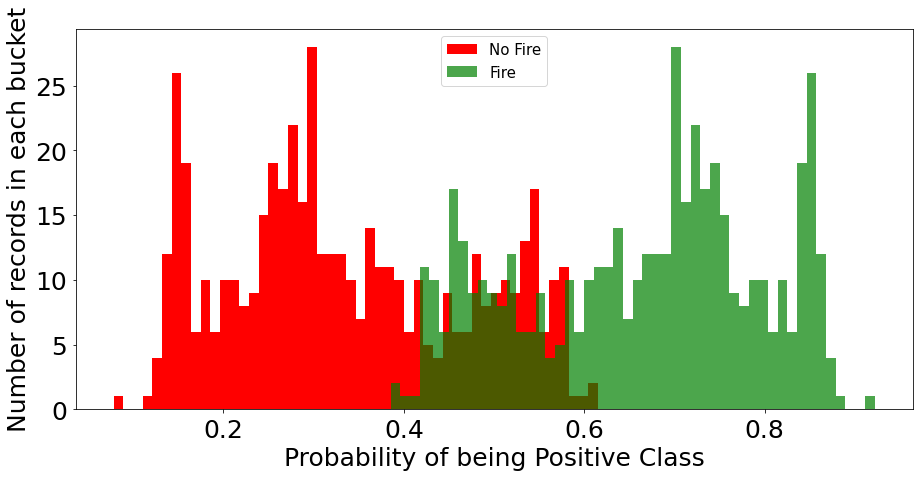

In [185]:
import matplotlib.pyplot as plt

prediction=clf.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show()

In [186]:
#Naive Bayes
nb = BernoulliNB().fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)
accuracy_score(y_test, y_nb_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6713995943204868

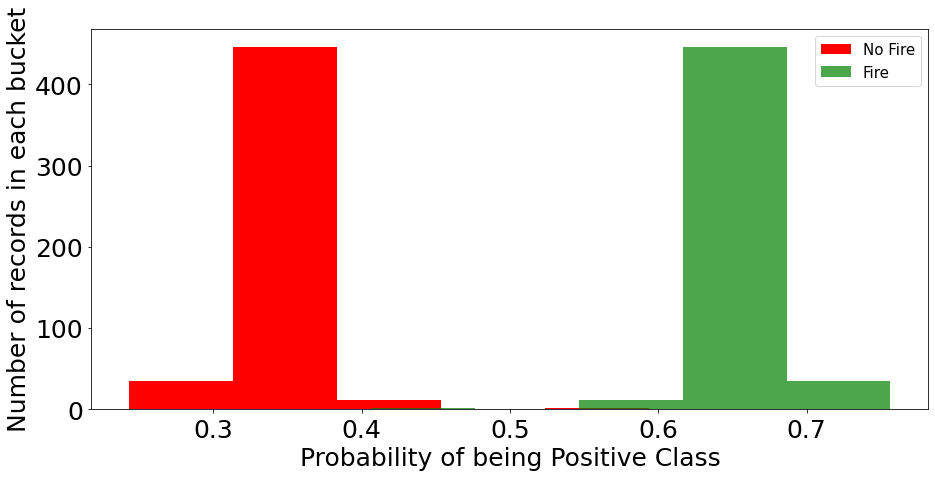

In [187]:
prediction_nb=nb.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_nb[:,0], bins=5, label='No Fire',color='r')
plt.hist(prediction_nb[:,1], bins=5, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [188]:
svm_clf = svm.SVC().fit(X_train, y_train)
y_svm_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_svm_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6693711967545639

In [189]:
svm_clf.score(X_train, y_train)

0.6576942610462163

In [190]:
print('Classification Report:\n',classification_report(y_test, y_svm_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_svm_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       163
         1.0       0.67      1.00      0.80       330

    accuracy                           0.67       493
   macro avg       0.33      0.50      0.40       493
weighted avg       0.45      0.67      0.54       493

Confusion Matrix:
 [[  0 163]
 [  0 330]]


C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
dt_clf = DecisionTreeClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)
y_dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, y_dt_pred)

0.7667342799188641

In [192]:
dt_clf.score(X_train, y_train)

1.0

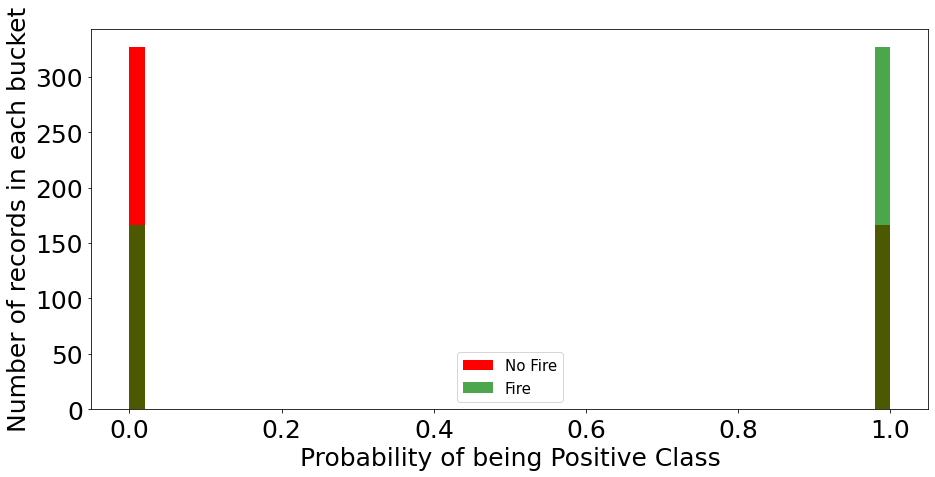

In [193]:
prediction_dt=dt_clf.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_dt[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction_dt[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [194]:
print('Classification Report:\n',classification_report(y_test, y_dt_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_dt_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.66      0.65       163
         1.0       0.83      0.82      0.82       330

    accuracy                           0.77       493
   macro avg       0.74      0.74      0.74       493
weighted avg       0.77      0.77      0.77       493

Confusion Matrix:
 [[107  56]
 [ 59 271]]


In [195]:
rf_clf = RandomForestClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_rf_pred)

<ipython-input-195-b1478a3aad10>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf = RandomForestClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)


0.8498985801217038

In [196]:
rf_clf.score(X_train, y_train)

1.0

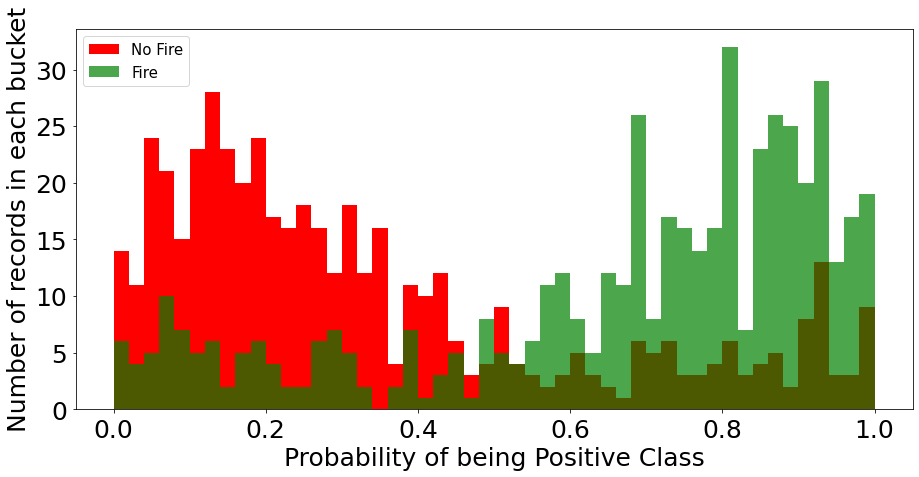

In [197]:
prediction_rf=rf_clf.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_rf[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction_rf[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [198]:
print('Classification Report:\n',classification_report(y_test, y_rf_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_rf_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.63      0.73       163
         1.0       0.84      0.96      0.90       330

    accuracy                           0.85       493
   macro avg       0.86      0.79      0.81       493
weighted avg       0.85      0.85      0.84       493

Confusion Matrix:
 [[102  61]
 [ 13 317]]
